# **Data Analysis Project For Restaurant Data**

# Connect Drive for google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Import Necessary libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset in DataFrame

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Classroom/Dataset .csv')
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


# Size of the Data

In [9]:
data.shape

(9551, 21)

## Types of cols

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Data look Mathematically

In [11]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Cheking Duplicate and Missing Value

In [12]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
data.duplicated().sum()

0

# **Level - 3**

# Task - 1  Restaurant Reviews

### Analyze the text reviews to identify the most comman positive and negative keywords.

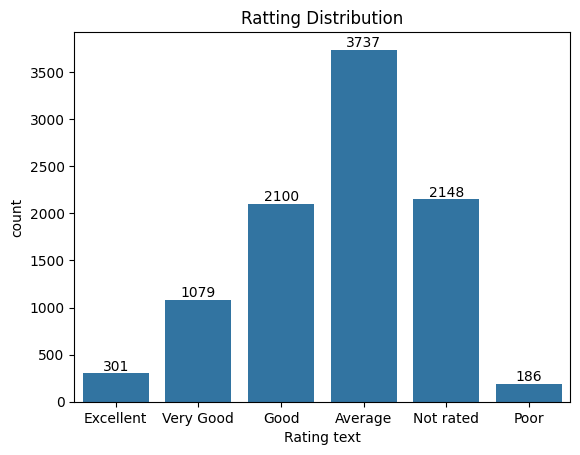

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='Rating text', data=data)
plt.title('Ratting Distribution')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [15]:
avg_rating = data['Rating text'].apply(len).mean()
print(f"Average rating: {avg_rating}")

Average rating: 7.020730813527379


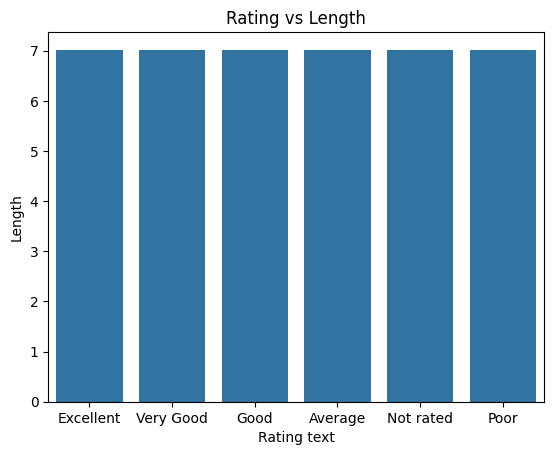

In [62]:
Length = data['Rating text'].apply(len).mean()
data['Length'] = Length
data.head()
sns.barplot(x = 'Rating text', y = 'Length', data = data)
plt.title("Rating vs Length")
plt.show()




# **Task - 2  Votes Analysis**

### Identify the restaurants with the highest and lowest number of votes.

In [17]:
X = data['Votes'].max()
print(f"Maximum votes is {X}")
Y = data['Votes'].min()
print(f"Minimum votes is {Y}")


Maximum votes is 10934
Minimum votes is 0


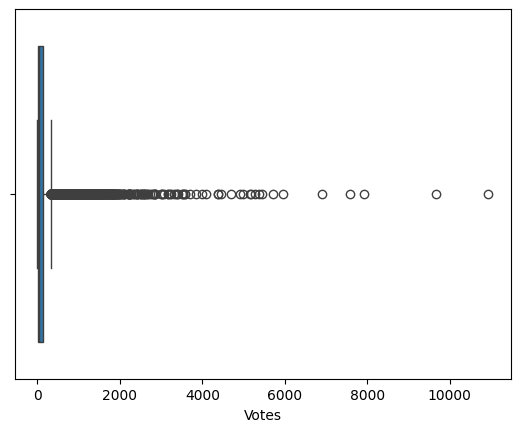

In [22]:
sns.boxplot(x = 'Votes', data = data)
plt.show()

### Analyze if there is a corelation between the number of votes and the rating of a restaurant.

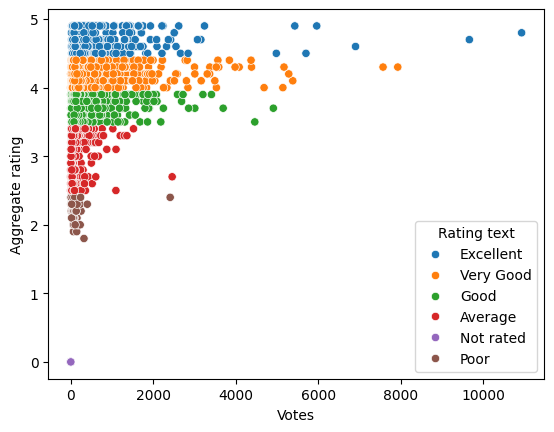

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = data, x = 'Votes', y = 'Aggregate rating', hue='Rating text')
plt.show()

## Task - 3 Price Range Vs Online Delivery and Tabel Booking

Analyze if there is a relationship between the price range and the avilability of online delivery and table booking.

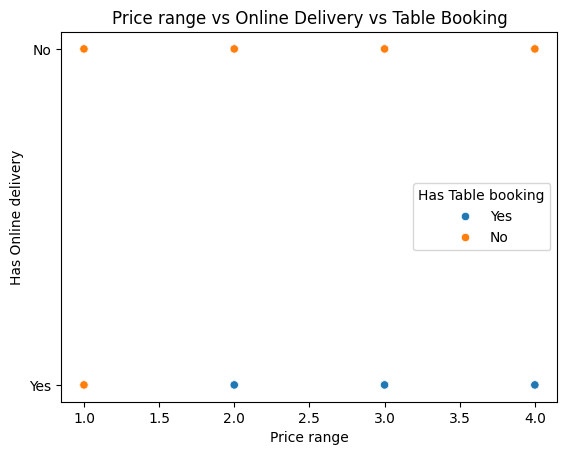

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data, x='Price range', y='Has Online delivery', hue='Has Table booking')
plt.title('Price range vs Online Delivery vs Table Booking')
plt.show()

### Determine if higher-priced restaurants are more likely to offer these services.

In [60]:
max_price = data['Price range'].max()
print(f"Maximum price is {max_price}")

Maximum price is 4


In [56]:
max_price = data['Price range'].max()
print(f"Maximum price is {max_price}")
higher_priced_restaurants = data[data['Price range'] == 'max_price']
higher_priced_restaurants.head()

Maximum price is 4


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Length
